# Лабораторная работа 10

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Дизеринг Бёрка

In [3]:
def from_rgb_to_mono(img):
    img = Image.open(img)
    arr = np.array(img)
    arr_br = get_brightness(arr)
    median = np.median(arr_br)
    arr_br = np.where(arr_br < median, 0, 255)
    return arr_br

def get_brightness(arr):
    return  0.222 * arr[:,:,0] + 0.707 *arr[:,:,1] + 0.071 * arr[:,:,2]

def disering_berk(img, edge):
    img = Image.open(img)
    arr = np.array(img)
    arr_br = get_brightness(arr)
    width = len(arr_br[0])
    height = len(arr_br[:, 0])
    for i in range(height):
        for j in range(width):
            value = arr_br[i, j]
            if arr_br[i, j] < edge:
                arr_br[i, j] = 0
            else:
                arr_br[i, j] = 255
            err = abs(value - arr_br[i, j])
            if j <= width - 3:
                arr_br[i, j+1] += err * 8/32
                arr_br[i, j+2] += err * 4/32
            elif j <= width - 2:
                arr_br[i, j+1] += err * 8/32
            if i < height-2:
                if j >= 2 and j <= width - 3:
                    arr_br[i+1, j-2] += err * 2/32
                    arr_br[i+1, j-1] += err * 4/32
                    arr_br[i+1, j] += err * 8/32
                    arr_br[i+1, j+1] += err * 4/32
                    arr_br[i, j+2] += err * 2/32

    return arr_br[3:-3,2:-2]

NameError: name 'Image' is not defined

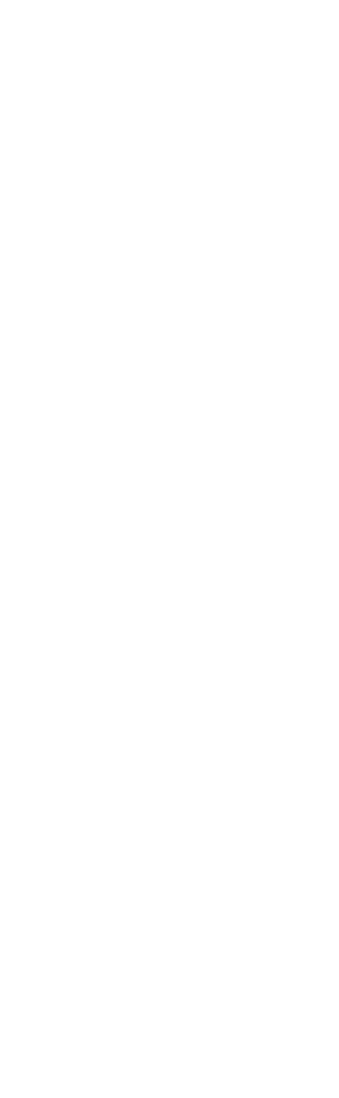

In [4]:
image_name = "images/6.png"
fig = plt.figure(figsize=(14, 14))
row, col = 1, 3
fig.add_subplot(row, col, 1)
plt.axis('off')
img = np.array(Image.open(image_name))
plt.imshow(img)
fig.add_subplot(row, col, 2)
plt.axis('off')
dis = disering_berk(image_name, edge=200)
plt.imshow(dis, cmap="gray")
fig.add_subplot(row, col, 3)
plt.axis('off')
bin = from_rgb_to_mono(image_name)
plt.imshow(bin, cmap="gray")

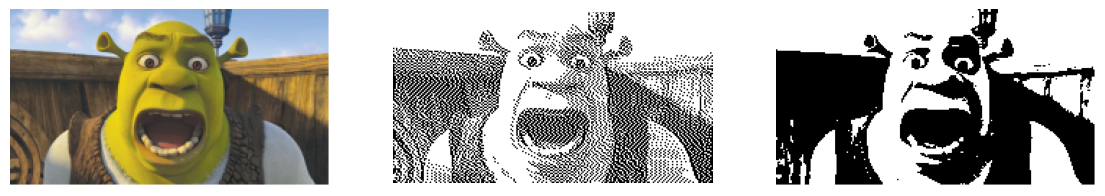

In [ ]:
image_name = "images/test5.png"
fig = plt.figure(figsize=(14, 14))
row, col = 1, 3
fig.add_subplot(row, col, 1)
plt.axis('off')
img = np.array(Image.open(image_name))
plt.imshow(img)
fig.add_subplot(row, col, 2)
plt.axis('off')
dis = disering_berk(image_name, edge=195)
plt.imshow(dis, cmap="gray")
fig.add_subplot(row, col, 3)
plt.axis('off')
bin = from_rgb_to_mono(image_name)
plt.imshow(bin, cmap="gray")

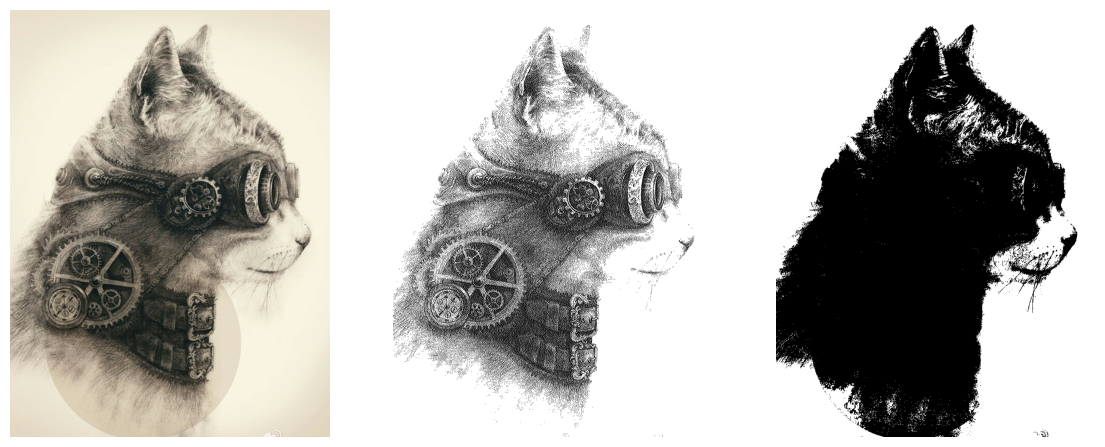

In [ ]:
image_name = "images/test13.jpg"
fig = plt.figure(figsize=(14, 14))
row, col = 1, 3
fig.add_subplot(row, col, 1)
plt.axis('off')
img = np.array(Image.open(image_name))
plt.imshow(img)
fig.add_subplot(row, col, 2)
plt.axis('off')
dis = disering_berk(image_name, edge=200)
plt.imshow(dis, cmap="gray")
fig.add_subplot(row, col, 3)
plt.axis('off')
bin = from_rgb_to_mono(image_name)
plt.imshow(bin, cmap="gray")

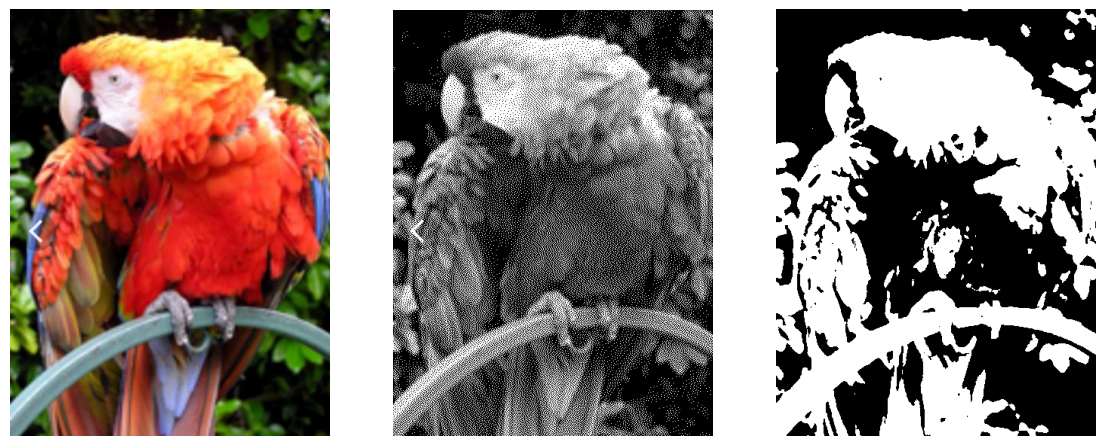

In [ ]:
image_name = "images/test14.jpg"
fig = plt.figure(figsize=(14, 14))
row, col = 1, 3
fig.add_subplot(row, col, 1)
plt.axis('off')
img = np.array(Image.open(image_name))
plt.imshow(img)
fig.add_subplot(row, col, 2)
plt.axis('off')
dis = disering_berk(image_name, edge=250)
plt.imshow(dis, cmap="gray")
fig.add_subplot(row, col, 3)
plt.axis('off')
bin = from_rgb_to_mono(image_name)
plt.imshow(bin, cmap="gray")

Метод сопряженных направлений

In [8]:
def f(x):
    x1, x2 = x
    return x1**2 + x2**2 - 4

In [9]:
def dx1(x1):
    return 2*x1

def dx2(x2):
    return 2*x2

def ddx1(x1):
    return 2

def ddx2(x2):
    return 2

In [10]:
A = [4, 4]
print(f(A))

28


In [11]:
def sopr_method(f, A, eps=0.5):
    x1, x2 = A
    p1, p2 = dx1(x1), dx2(x2)
    l = (dx1(x1) * p1 + dx2(x2) * p2) / ( (p1**2 + p2**2)*(ddx1(x1)*ddx2(x2)) )
    y = f(A)
    k = 1
    while np.sqrt(p1**2 + p2**2) > eps:
        x1_new, x2_new = x1 - l*p1, x2 - l*p2
        p1 = dx1(x1_new) + (dx1(x1_new)**2 + dx2(x2_new)**2) / (dx1(x1)**2 + dx2(x2)**2) * p1
        p2 = dx2(x2_new) + (dx1(x1_new)**2 + dx2(x2_new)**2) / (dx1(x1)**2 + dx2(x2)**2) * p2
        l = (dx1(x1_new) * p1 + dx2(x2_new) * p2) / ( (p1**2 + p2**2)*(ddx1(x1_new)*ddx2(x2_new)) )
        y = f([x1_new, x2_new])
        k += 1
        x1, x2 = x1_new, x2_new
        if k > 1000:
            break
    return y, x1_new, x2_new


In [12]:
y, x1, x2 = sopr_method(f, A, eps=0.01)

print(f"min = f({x1}, {x2}) = {y}")

min = f(0.0009765625, 0.0009765625) = -3.999998092651367


In [14]:
from scipy import optimize

res = optimize.fmin_bfgs(f, [4,4])
x_min, y_min = res[0], res[1]
print(x_min, y_min)


Optimization terminated successfully.
         Current function value: -4.000000
         Iterations: 3
         Function evaluations: 12
         Gradient evaluations: 4
2.971749135660673e-08 2.9717490690472914e-08
